# Tennis Ace


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


Project Goals:
- Build linear regression model that predicts the outcome of a tennis player based on theit playing habits
- Conclude as to what constitutes the best players in the world

Data:
- Association of Tennis Professionals (ATP)
- Data from top 1500 players in the ATP from 2009 to 2017

#### Load relevant libraries:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Load and investigate the data here:

In [3]:
data = pd.read_csv('tennis_stats.csv')
data.head() # -> Overview
#data.count() -> No missing data
#data.describe() -> Look for outliers, extrem values
#data.columns -> Investigate the different columns
#data.dtypes -> Right datatypes

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


#### Exploratory analysis:

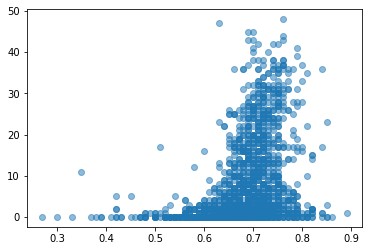

<Figure size 432x288 with 0 Axes>

In [4]:
plt.scatter(data.FirstServePointsWon, data.Wins, alpha=0.5)
plt.show()
plt.clf()

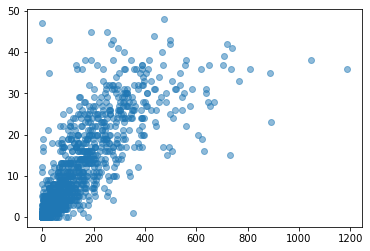

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(data.Aces, data.Wins, alpha=0.5)
plt.show()
plt.clf()

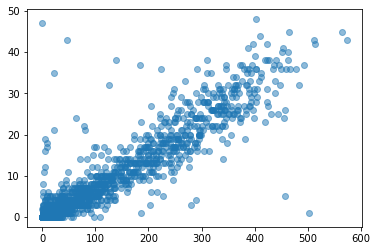

<Figure size 432x288 with 0 Axes>

In [6]:
plt.scatter(data.BreakPointsOpportunities, data.Wins, alpha=0.5)
plt.show()
plt.clf()

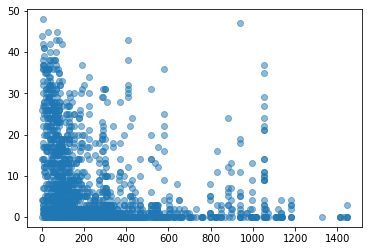

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(data.Ranking, data.Wins, alpha=0.5)
plt.show()
plt.clf()

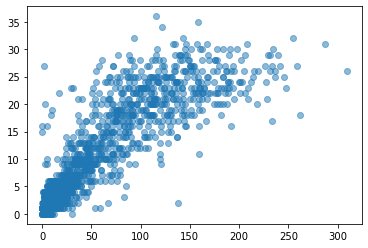

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(data.DoubleFaults, data.Losses, alpha=0.5)
plt.show()
plt.clf()

#### Single feature linear regressions:

In [9]:
features = data[['DoubleFaults']]
outcome = data[['Losses']]

In [10]:
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [11]:
model = LinearRegression()
model.fit(features_train, outcome_train)

LinearRegression()

In [12]:
model.score(features_test,outcome_test)

0.7843003907259485

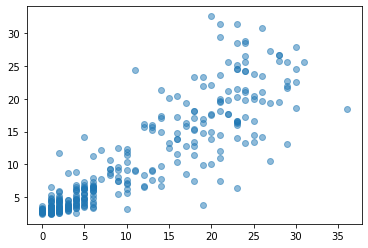

In [13]:
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha = 0.5)

In [14]:
features_2 = data[['BreakPointsOpportunities']]
outcome_2 = data[['Winnings']]

In [15]:
features_train_2, features_test_2, outcome_train_2, outcome_test_2 = train_test_split(features_2, outcome_2, train_size = 0.8)

In [16]:
model = LinearRegression()
model.fit(features_train_2, outcome_train_2)

LinearRegression()

In [17]:
model.score(features_test_2,outcome_test_2)

0.8129843760827925

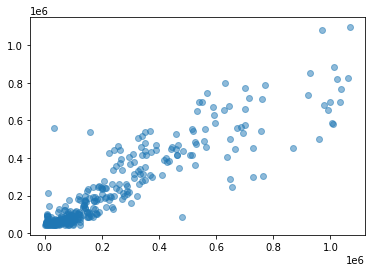

In [18]:
prediction_2 = model.predict(features_test_2)
plt.scatter(outcome_test_2,prediction_2, alpha = 0.5)

#### Two feature linear regressions:

In [19]:
features = data[['BreakPointsOpportunities',
'FirstServeReturnPointsWon']]
outcome = data[['Winnings']]


In [20]:
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [21]:
model = LinearRegression()
model.fit(features_train, outcome_train)

LinearRegression()

In [22]:
model.score(features_test,outcome_test)

0.7710488037450853

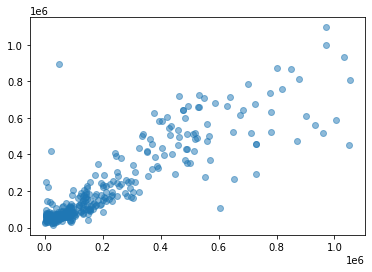

In [23]:
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha = 0.5)

#### Multiple feature linear regressions:

In [24]:
features = data[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = data[['Winnings']]


In [25]:
features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = 0.8)

In [26]:
model = LinearRegression()
model.fit(features_train, outcome_train)

LinearRegression()

In [27]:
model.score(features_test,outcome_test)

0.8262702348708025

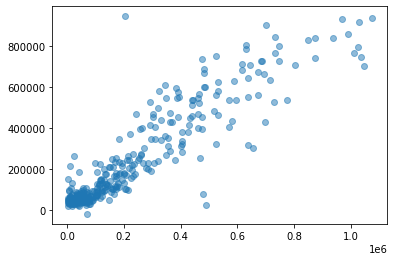

In [28]:
prediction = model.predict(features_test)
plt.scatter(outcome_test,prediction, alpha = 0.5)

#### Conclusion:

- Many features seem to have strong correlation with certain outcomes
    - BreakPointsOpportunities and Winning
    - DoubleFaults and Losses
- Able to build Linear Regression Model to predict
    - Winning based on BreakPointsOpportunities
    - Losses based on DoubleFaults  
- Able to build multiple Linear Regression Model to predict
    - Winnings based on FirstServeReturnPointsWon and BreakPointsOpportunities
    - Winnings based on all the features